<a href="https://colab.research.google.com/github/mejhana/data-project-framework/blob/master/datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


importing neccesary libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

about dataset

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)

12.ca: The number of major vessels (0-4)

13.thal: A blood disorder called thalassemia (0 = normal; 1 = fixed defect; 2 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)

In [3]:
# loading the dataset
dataset = pd.read_csv(r"/content/drive/My Drive/heart-disease-uci/heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# understanding the ranges of different values
categorical_val = []
continous_val = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [5]:
#finding missing values
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

the corelation map will not make much sense because some attributes have different values that represent different things eg-
cp (chest pain type) 

0: Typical angina 

1: Atypical angina 

2: Non-anginal pain
 
3: Asymptomatic


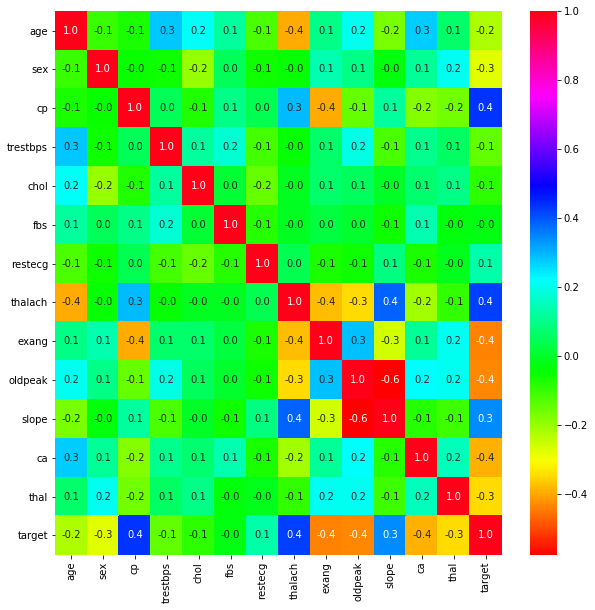

In [6]:
#corelation map
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,cmap='hsv',fmt='.1f')
plt.show()

In [7]:
print("The Highest Correlating features with target is :")
dataset.corr()["target"].sort_values(ascending=False)[1:][:-1]

The Highest Correlating features with target is :


cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
Name: target, dtype: float64

making a copy of the data frame to rename indexes to what it represents and later making additional columns

In [0]:
dt=dataset.copy()

In [69]:
#replacing female with 0 and male with 1
dt['sex'].replace(0, 'Female',inplace=True)
dt['sex'].replace(1, 'Male',inplace=True)
#replacing chest pain type index with type
dt['cp'].replace(0, 'typical angina',inplace=True)
dt['cp'].replace(1, 'atypical angina',inplace=True)
dt['cp'].replace(2, 'non-anginal pain',inplace=True)
dt['cp'].replace(3, 'asymptomatic',inplace=True)
#replacing fasting blood sugar index with value
dt['fbs'].replace(0, '< 120mg/ml',inplace=True)
dt['fbs'].replace(1, '> 120mg/ml',inplace=True)
#replacing resting ecg with values
dt['restecg'].replace(0,'normal',inplace=True)
dt['restecg'].replace(1,'ST-T wave abnormality',inplace=True)
dt['restecg'].replace(2,'left ventricular hypertrophy',inplace=True)
#replacing excercise induced angina values
dt['exang'].replace(0,'no',inplace=True)
dt['exang'].replace(1,'yes',inplace=True)
#replacing st_slope values
dt['slope'].replace(0,'up slope',inplace=True)
dt['slope'].replace(1,'no slope',inplace=True)
dt['slope'].replace(2,'down slope',inplace=True)
#replacing thalassemia values
#dt['thal'].replace(0,'normal',inplace=True)
dt['thal'].replace(1,'normal',inplace=True)
dt['thal'].replace(2,'fixed defect',inplace=True)
dt['thal'].replace(3,'reversible defect',inplace=True)
dt.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,> 120mg/ml,normal,150,no,2.3,up slope,0,normal,1
1,37,Male,non-anginal pain,130,250,< 120mg/ml,ST-T wave abnormality,187,no,3.5,up slope,0,fixed defect,1
2,41,Female,atypical angina,130,204,< 120mg/ml,normal,172,no,1.4,down slope,0,fixed defect,1
3,56,Male,atypical angina,120,236,< 120mg/ml,ST-T wave abnormality,178,no,0.8,down slope,0,fixed defect,1
4,57,Female,typical angina,120,354,< 120mg/ml,ST-T wave abnormality,163,yes,0.6,down slope,0,fixed defect,1


analysis


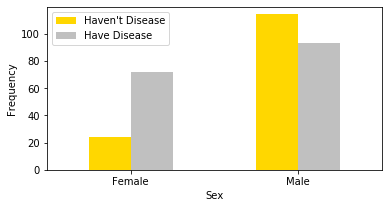

In [70]:
pd.crosstab(dt.sex,dt.target).plot(kind="bar",figsize=(6,3),color=['gold','silver' ])
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

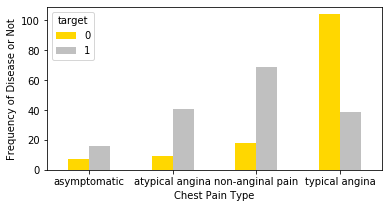

In [71]:
pd.crosstab(dt.cp,dt.target).plot(kind="bar",figsize=(6,3),color=['gold','silver' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

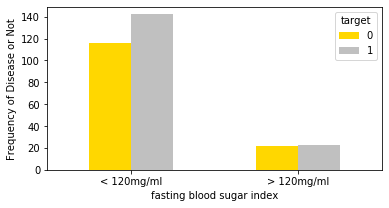

In [72]:
pd.crosstab(dt.fbs,dt.target).plot(kind="bar",figsize=(6,3),color=['gold','silver' ])
plt.xlabel('fasting blood sugar index')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

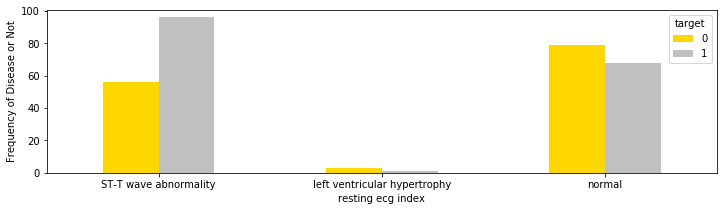

In [73]:
pd.crosstab(dt.restecg,dt.target).plot(kind="bar",figsize=(12,3),color=['gold','silver' ])
plt.xlabel('resting ecg index')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

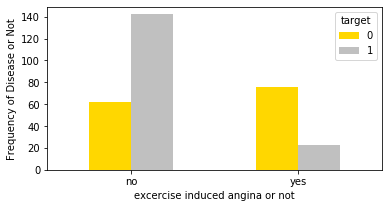

In [74]:
pd.crosstab(dt.exang,dataset.target).plot(kind="bar",figsize=(6,3),color=['gold','silver' ])
plt.xlabel('excercise induced angina or not')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

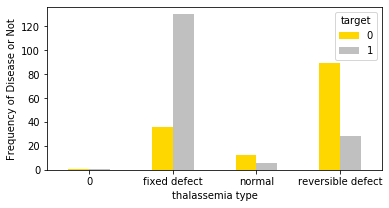

In [75]:
pd.crosstab(dt.thal,dt.target).plot(kind="bar",figsize=(6,3),color=['gold','silver' ])
plt.xlabel('thalassemia type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [0]:
dt= pd.get_dummies(dt, drop_first=True)

In [77]:
dt.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_> 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_no slope,slope_up slope,thal_fixed defect,thal_normal,thal_reversible defect
0,63,145,233,150,2.3,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [78]:
print('Data Show Describe\n')
dt.describe()

Data Show Describe



,age,trestbps,chol,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_> 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_no slope,slope_up slope,thal_fixed defect,thal_normal,thal_reversible defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554,0.683168,0.165017,0.287129,0.471947,0.148515,0.013201,0.485149,0.326733,0.462046,0.069307,0.547855,0.059406,0.386139
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835,0.466011,0.371809,0.453171,0.500038,0.356198,0.114325,0.500606,0.469794,0.499382,0.254395,0.498528,0.236774,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
print('Data Show Info\n')
dt.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
age                                     303 non-null int64
trestbps                                303 non-null int64
chol                                    303 non-null int64
thalach                                 303 non-null int64
oldpeak                                 303 non-null float64
ca                                      303 non-null int64
target                                  303 non-null int64
sex_Male                                303 non-null uint8
cp_atypical angina                      303 non-null uint8
cp_non-anginal pain                     303 non-null uint8
cp_typical angina                       303 non-null uint8
fbs_> 120mg/ml                          303 non-null uint8
restecg_left ventricular hypertrophy    303 non-null uint8
restecg_normal                          303 non-null uint8
exang_yes                               303 non-nul

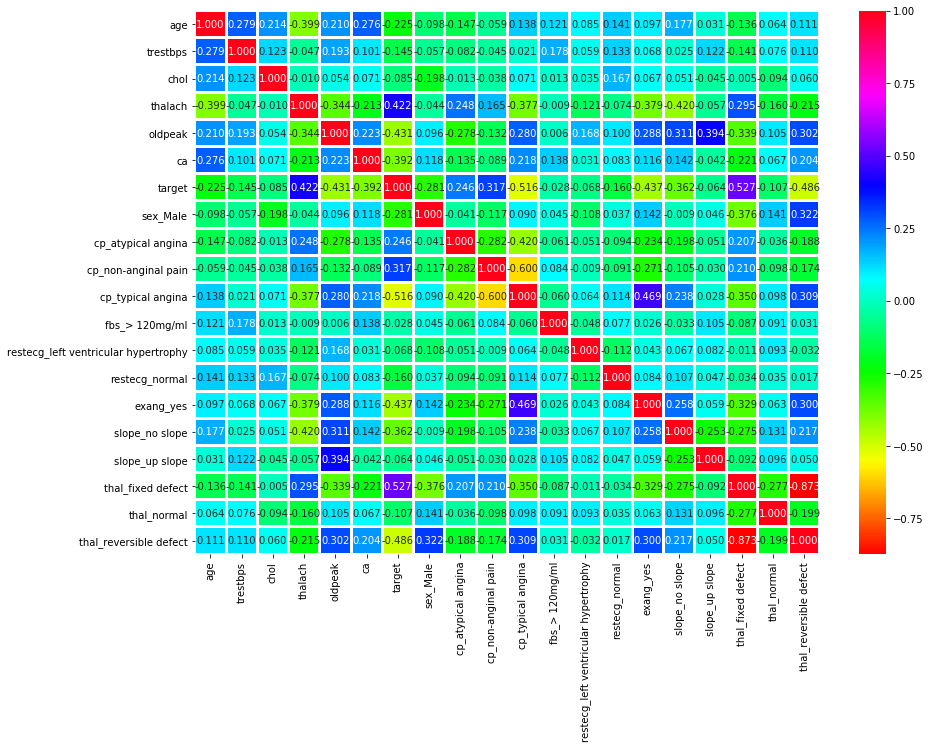

In [80]:
plt.figure(figsize=(14,10))
sns.heatmap(dt.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [81]:
print("The Highest Correlating features with target is :")
dt.corr()["target"].sort_values(ascending=False)[1:][:-1]

The Highest Correlating features with target is :


thal_fixed defect                       0.527334
thalach                                 0.421741
cp_non-anginal pain                     0.316742
cp_atypical angina                      0.245879
fbs_> 120mg/ml                         -0.028046
slope_up slope                         -0.063554
restecg_left ventricular hypertrophy   -0.068410
chol                                   -0.085239
thal_normal                            -0.106589
trestbps                               -0.144931
restecg_normal                         -0.159775
age                                    -0.225439
sex_Male                               -0.280937
slope_no slope                         -0.362053
ca                                     -0.391724
oldpeak                                -0.430696
exang_yes                              -0.436757
thal_reversible defect                 -0.486112
Name: target, dtype: float64